In [2]:
# !!!!PLEASE READ BEFORE HAND!!!!

# There are three lines of code where you run them and use the AZAPI lyrics to get the lyrics of a song and then pass
# those lyrics into a sentiment analyzer. I found the it often, and sporadically returns an IndexError that says index is out
# of range. This is not true. I have found that when encountered with this error, a simple rerun of THAT SPECIFIC BLOCK ONLY 
# solves the problem. I don't why this occurs and I tried finding an explanation for this on the internet with no success. 

# I ask that you run this program line by line, and though this may seem annoying, the code that is here can easily be complied
# and doesn't take that long to run, aside from those three lines of code. 

# Another important note, that I talked with Dr.Zietz about, is that when I tried to use the Spotify API endpoint to find
# the top tracks for an artist, it returns a 400 error. This is interesting as there is no 400 coded error on the website for 
# that particular endpoint. Don't believe me? Look here: https://developer.spotify.com/documentation/web-api/reference/get-an-artists-top-tracks


In [1]:
# Use the spotipy api to get the top tracks of an artist, then use and azapi lyrics to get the lyrics of the artist, and then use
# those lyrics to conduct my sentiment analysis using NLTK, and compare those sentiments and see if there's a correlation with said artists
# top selling albums. 
# loading the dotenv package so that we can use our environment variable that has our client key and secret key. 
from dotenv import load_dotenv
import os
load_dotenv("3510.env")
C_ID = os.getenv("CLIENT_SPOTIFY_ID")
S_ID = os.getenv("CLIENT_SECRET_ID")

In [2]:
# generating the access token
import requests
import json

# specify grantType based on auth docs
grantType = "client_credentials"

# Request based on Client Credentials Flow from
# https://developer.spotify.com/documentation/web-api/tutorials/client-credentials-flow

bodyParams = {"grant_type":grantType}
url = "https://accounts.spotify.com/api/token/"

response = requests.post(url, data=bodyParams, auth = (C_ID, S_ID)).json()

In [3]:
# We'll need to use our headers in all the requests that we make, so we can do that now.
headers = {"Authorization":"Bearer "+response["access_token"]}
rootURL = "https://api.spotify.com/v1/"

KeyError: 'access_token'

In [6]:
# %20 for a space

In [7]:
import urllib
urllib.parse.quote("!!!")

'%21%21%21'

In [8]:
# here, we're making a request to the spotify api for a search for any artist that matches the Pink Floyd Criteria
pink_floyd_req = requests.get(rootURL+"search?q=PinkFloyd&type=artist", headers=headers).json()
pink_floyd_req

{'artists': {'href': 'https://api.spotify.com/v1/search?query=PinkFloyd&type=artist&offset=0&limit=20',
  'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0k17h0D3J5VfsdmQ1iZtE9'},
    'followers': {'href': None, 'total': 19757189},
    'genres': ['album rock',
     'art rock',
     'classic rock',
     'progressive rock',
     'psychedelic rock',
     'rock',
     'symphonic rock'],
    'href': 'https://api.spotify.com/v1/artists/0k17h0D3J5VfsdmQ1iZtE9',
    'id': '0k17h0D3J5VfsdmQ1iZtE9',
    'images': [{'height': 977,
      'url': 'https://i.scdn.co/image/e69f71e2be4b67b82af90fb8e9d805715e0684fa',
      'width': 1000},
     {'height': 625,
      'url': 'https://i.scdn.co/image/d011c95081cd9a329e506abd7ded47535d524a07',
      'width': 640},
     {'height': 195,
      'url': 'https://i.scdn.co/image/f0a39a8a196a87a7236bdcf8a8708f6d5d3547cc',
      'width': 200},
     {'height': 63,
      'url': 'https://i.scdn.co/image/ec1fb7127168dbaa962404031409c5a293b95ec6',

In [9]:
# What we get are nested dictionaries. Let's explore the keys.
# In this first dictionary, we have only an artist key. 
pink_floyd_req.keys()

dict_keys(['artists'])

In [10]:
# The value of the artist key is another dictionary, with their keys below. 
pink_floyd_req["artists"].keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [11]:
# Now, if we want to get the tracks or anything else about Pink Floyd, we'll need their ID's
pink_floyd_req['artists']
# How perfect, the list contains more nested dictionaries. The first element in the list is dictionary 0, the second dic.1, and
# so on and so forth. We want the first one since that's the pink floyd that we're interested in. 

{'href': 'https://api.spotify.com/v1/search?query=PinkFloyd&type=artist&offset=0&limit=20',
 'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0k17h0D3J5VfsdmQ1iZtE9'},
   'followers': {'href': None, 'total': 19757189},
   'genres': ['album rock',
    'art rock',
    'classic rock',
    'progressive rock',
    'psychedelic rock',
    'rock',
    'symphonic rock'],
   'href': 'https://api.spotify.com/v1/artists/0k17h0D3J5VfsdmQ1iZtE9',
   'id': '0k17h0D3J5VfsdmQ1iZtE9',
   'images': [{'height': 977,
     'url': 'https://i.scdn.co/image/e69f71e2be4b67b82af90fb8e9d805715e0684fa',
     'width': 1000},
    {'height': 625,
     'url': 'https://i.scdn.co/image/d011c95081cd9a329e506abd7ded47535d524a07',
     'width': 640},
    {'height': 195,
     'url': 'https://i.scdn.co/image/f0a39a8a196a87a7236bdcf8a8708f6d5d3547cc',
     'width': 200},
    {'height': 63,
     'url': 'https://i.scdn.co/image/ec1fb7127168dbaa962404031409c5a293b95ec6',
     'width': 64}],
   'name': 'P

In [12]:
# We are indexing the first element in the list, which is a dictionary containing the information that we need about the Pink
# Floyd that we're interested in. 
pink_floyd_req['artists']["items"][0]
# Now remember, we still need the ID, and we see that the id is a key with the id value as its value. 

{'external_urls': {'spotify': 'https://open.spotify.com/artist/0k17h0D3J5VfsdmQ1iZtE9'},
 'followers': {'href': None, 'total': 19757189},
 'genres': ['album rock',
  'art rock',
  'classic rock',
  'progressive rock',
  'psychedelic rock',
  'rock',
  'symphonic rock'],
 'href': 'https://api.spotify.com/v1/artists/0k17h0D3J5VfsdmQ1iZtE9',
 'id': '0k17h0D3J5VfsdmQ1iZtE9',
 'images': [{'height': 977,
   'url': 'https://i.scdn.co/image/e69f71e2be4b67b82af90fb8e9d805715e0684fa',
   'width': 1000},
  {'height': 625,
   'url': 'https://i.scdn.co/image/d011c95081cd9a329e506abd7ded47535d524a07',
   'width': 640},
  {'height': 195,
   'url': 'https://i.scdn.co/image/f0a39a8a196a87a7236bdcf8a8708f6d5d3547cc',
   'width': 200},
  {'height': 63,
   'url': 'https://i.scdn.co/image/ec1fb7127168dbaa962404031409c5a293b95ec6',
   'width': 64}],
 'name': 'Pink Floyd',
 'popularity': 76,
 'type': 'artist',
 'uri': 'spotify:artist:0k17h0D3J5VfsdmQ1iZtE9'}

In [13]:
# Great, now we've saved the ID of Pink Floyd in a variable.
pf_id = pink_floyd_req['artists']["items"][0]["id"]

In [14]:
# The next logical step would be to make a function that gets the id for any artist that we pass into it. 
def get_artist_id(artist):
# the first thing we did was make a request to find the artist that we pass in.
    artist_name = requests.get(rootURL+"search?q=" +artist+"&type=artist", headers=headers).json()
# The next thing that we would want to do is to get the id of the artist. 
# Theoretically, we have already made a request for the artist, which returns nested dictionaries.
# what we'll want to do is iterate through the nested dictionaries as in the pink floyd request.
    artist_ID = artist_name["artists"]["items"][0]["id"]
    return artist_ID

    

In [15]:
print(get_artist_id("Led Zepplin"))

36QJpDe2go2KgaRleHCDTp


In [16]:
print(get_artist_id("Pink Floyd"))

0k17h0D3J5VfsdmQ1iZtE9


In [17]:
print(get_artist_id("Jimi Hendrix"))

776Uo845nYHJpNaStv1Ds4


In [18]:
# Great, now we have a function that allowes us to the ID of any artist that we pass into the function header. 
# The next step is writing code that will allow us to get the albums from those artists. 
#We can do this by using the get artists albums documentation

In [19]:
pf_ID = get_artist_id("Pink Floyd") 
lz_ID = get_artist_id("Led Zepplin")
jh_ID = get_artist_id("Jimi Hendrix")

In [20]:
pf_albums = requests.get(rootURL+"artists/"+pf_ID+"/albums?include_groups=album&limit=20", headers=headers).json()

In [21]:
pf_albums["items"]

[{'album_group': 'album',
  'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0k17h0D3J5VfsdmQ1iZtE9'},
    'href': 'https://api.spotify.com/v1/artists/0k17h0D3J5VfsdmQ1iZtE9',
    'id': '0k17h0D3J5VfsdmQ1iZtE9',
    'name': 'Pink Floyd',
    'type': 'artist',
    'uri': 'spotify:artist:0k17h0D3J5VfsdmQ1iZtE9'}],
  'available_markets': ['AR',
   'AU',
   'BO',
   'BR',
   'CA',
   'CL',
   'CO',
   'CR',
   'DO',
   'EC',
   'SV',
   'GT',
   'HN',
   'HK',
   'MY',
   'MX',
   'NZ',
   'NI',
   'PA',
   'PY',
   'PE',
   'PH',
   'SG',
   'TW',
   'UY',
   'US',
   'ID',
   'JP',
   'TH',
   'VN',
   'IL',
   'ZA',
   'SA',
   'AE',
   'BH',
   'QA',
   'OM',
   'KW',
   'EG',
   'MA',
   'TN',
   'LB',
   'JO',
   'PS',
   'IN',
   'KR',
   'BD',
   'PK',
   'LK',
   'GH',
   'KE',
   'NG',
   'TZ',
   'UG',
   'AG',
   'BS',
   'BB',
   'BZ',
   'BT',
   'BW',
   'BF',
   'CV',
   'CW',
   'DM',
   'FJ',
   'GM',
   'GD',
   'GW',
  

In [22]:
# Great, now that we have some code that allows us to get the artists albums and their ID's, let's write a function to do this
# for the remaining albums:
def getAlbumID(artist_name):
# this portion of code will make the request to kick things off.
    artist_req = requests.get(rootURL+"search?q=" +artist_name+"&type=artist", headers=headers).json()
# ok, now we have the artist request in the variable artist_album. But remember, to get the albums of the artist, we'll still
# need the artist's ID. So let's do that here:
    artists_id = artist_req["artists"]["items"][0]["id"]
# Now, theoretically, we have the artist's ID. 
# With this ID we can make another request to get the albums of the artist.
    artist_album_req = requests.get(rootURL+"artists/"+artists_id+"/albums?include_groups=album&limit=10", headers=headers).json()
# Theoretically, again, we should now have the dictionaries of the results from this request that we just made. 
# now I think is where we write the for like we did for the pink floyd album. However, in the Pink Floyd for loop I've modified
# so that I use or conditionals to get the exact albums that I want. I don't quite know how to generalize that for the other 
# albums. 
    for album_titles in artist_album_req["items"]:
        print("Here is album '{0}' and its ID: {1}".format(album_titles["name"], album_titles["id"]))
        print()

In [23]:
# now that we theoritcally have a function that can get both the artist ID and the album ID for a set number of albums
# The next logical step would be to get the song tracks for those albums. 

In [24]:
# State of the project so far.
# We can now easily access the artist ID...
print(pf_ID)
print(lz_ID)
print(jh_ID)

0k17h0D3J5VfsdmQ1iZtE9
36QJpDe2go2KgaRleHCDTp
776Uo845nYHJpNaStv1Ds4


In [25]:
# Now that we have the artists ID, we can use this to get the top tracks of the artists. 
top_tracks_pf = requests.get(rootURL+"artists/"+pf_ID+"/top-tracks", headers=headers).json()
top_tracks_lz = requests.get(rootURL+"artists/"+lz_ID+"/top-tracks", headers=headers).json()
top_tracks_jh = requests.get(rootURL+"artists/"+jh_ID+"/top-tracks", headers=headers).json()

In [26]:
top_tracks_pf

{'error': {'status': 400, 'message': 'missing country parameter'}}

In [27]:
# For what ever reason this endpoint didn't seem to work; this wil be reflected in the write up. Continue with Spotipy. 

In [28]:
import spotipy

In [29]:
# spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
# spotipy will keep track of our token for us
clientCredentialManager = SpotifyClientCredentials(client_id=os.getenv("CLIENT_SPOTIFY_ID"),
                            client_secret=os.getenv("CLIENT_SECRET_ID"))

In [30]:
sp = spotipy.Spotify(client_credentials_manager=clientCredentialManager)

In [31]:
artist_IDs_List = [pf_ID, lz_ID, jh_ID]
for artistID in artist_IDs_List:
# get the name of the artist
    artist_info = sp.artist(artistID)
    artist_name = artist_info["name"]
# make a "request to the spotipy api for the top tracks of the artist."
    ID = sp.artist_top_tracks(artistID, country='US')["tracks"]
    print(f"Artist: {artist_name}")
    for true_ID in ID: 
        print(f"Track: {true_ID['name']}")
        print(f"Track ID: {true_ID['id']}")
        print()

Artist: Pink Floyd
Track: Another Brick in the Wall, Pt. 2
Track ID: 4gMgiXfqyzZLMhsksGmbQV

Track: Wish You Were Here
Track ID: 6mFkJmJqdDVQ1REhVfGgd1

Track: Comfortably Numb
Track ID: 5HNCy40Ni5BZJFw1TKzRsC

Track: Breathe (In the Air)
Track ID: 2ctvdKmETyOzPb2GiJJT53

Track: Money
Track ID: 0vFOzaXqZHahrZp6enQwQb

Track: The Great Gig in the Sky
Track ID: 2TjdnqlpwOjhijHCwHCP2d

Track: Time
Track ID: 3TO7bbrUKrOSPGRTB5MeCz

Track: Hey You
Track ID: 7F02x6EKYIQV3VcTaTm7oN

Track: Shine On You Crazy Diamond (Pts. 1-5)
Track ID: 6pnwfWyaWjQiHCKTiZLItr

Track: Brain Damage
Track ID: 05uGBKRCuePsf43Hfm0JwX

Artist: Led Zeppelin
Track: Immigrant Song - Remaster
Track ID: 78lgmZwycJ3nzsdgmPPGNx

Track: Stairway to Heaven - Remaster
Track ID: 5CQ30WqJwcep0pYcV4AMNc

Track: Whole Lotta Love - 1990 Remaster
Track ID: 0hCB0YR03f6AmQaHbwWDe8

Track: Black Dog - Remaster
Track ID: 3qT4bUD1MaWpGrTwcvguhb

Track: Rock and Roll - Remaster
Track ID: 4PRGxHpCpF2yoOHYKQIEwD

Track: Good Times Bad Tim

In [32]:
# Great, now that we have the top tracks for out artists, we can go ahead and import azapi library to get the lyrics of these
# songs. 
# !pip install azapi

In [33]:
from azapi import AZlyrics
azAPILyrics = AZlyrics()

In [34]:
# Yay, now we have all the lyrics for the top tracks for The Beatles,Led Zeppelin, and Pink Floyd
# let's import NLTK so that we can use it's sentiment analyzer
import nltk

In [36]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [37]:
# instantiate the SentimentIntensityAnalyzer
vader_analyzer = SentimentIntensityAnalyzer()

In [38]:
# create a function where you can feed in the variables and get your polarity score output. 
def getPolarityScore(artistLyrics):
    pol_scores = vader_analyzer.polarity_scores(artistLyrics)
    return pol_scores

In [39]:
# to get the audio file using the spotify api, we'll use the endpoint audio-features/{id}
# let's try and define a function that will get the audio features of our songs. 
def get_audio_features(songID):
    audio_features = requests.get(rootURL+"audio-features/"+str(songID), headers=headers).json()
    return audio_features

In [40]:
import numpy as np
import pandas as pd

In [41]:
 import seaborn as sb
import matplotlib.pyplot as plt

In [42]:
# Ultimately you'll want to create one big dataframe with an additional column that has the artist name.
# With this
# Lets try and create that dataframe
# let's create our column names
columns = ["loudness","energy","tempo"]
overall_df = pd.DataFrame(columns=columns)
overall_df
# the idea here is to first get all the audio features in the DataFrame, so let's try that first. 

,loudness,energy,tempo


In [43]:
# now that we have NLTK, let's import the sentiment analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\luisf\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [44]:
# have a list with all the audio features for each song and the sentiments. These will all be dictionaries.
artist_list = [pf_ID, lz_ID, jh_ID]
audio_list = []
for artist in artist_list:
    top_tracks = sp.artist_top_tracks(artist, country='US')["tracks"]
# get audio features
    for track in top_tracks:
        audio_list.append(get_audio_features(track["id"]))

In [45]:
for features in audio_list:
    overall_df.loc[len(overall_df)] = [features["loudness"],features["energy"], features["tempo"]]

In [46]:
overall_song_df = overall_df.set_index(pd.Series(["Another Brick in the Wall", "Wish You Were Here", 
                                "Comfortably Numb", " Breathe", "Money", "The Great Gig in the Sky", "Time", "Hey You",
                               "Shine On You Crazy Diamond", "Brain Damage", "Immigrant Song", "Stairway to Heaven",
                               "Whole Lotta Love", "Black Dog - Remaster", "Rock and Roll", "Good Times Bad Times",
                               "Ramble On", "Kashmir - Remaster", "Going to California - Remaster", "Over the Hills and Far Away",
                               "All Along the Watchtower", "Little Wing", "Purple Haze", "Hey Joe", "Voodoo Child (Slight Return)", "The Wind Cries Mary", "Foxey Lady",
                                "Castles Made of Sand", "Crosstown Traffic", "Red House"]))

In [47]:
analysis_df = overall_song_df.reset_index()

In [48]:
analysis_df2 = analysis_df.rename({"index":"Band"}, axis=1)

In [49]:
analysis_df2

,Band,loudness,energy,tempo
0,Another Brick in the Wall,-15.882,0.394,104.114
1,Wish You Were Here,-15.730,0.262,122.861
2,Comfortably Numb,-12.595,0.366,127.163
3,Breathe,-15.142,0.373,128.153
4,Money,-10.422,0.536,126.256
5,The Great Gig in the Sky,-13.814,0.217,116.334
6,Time,-11.790,0.480,120.285
7,Hey You,-14.976,0.302,112.460
8,Shine On You Crazy Diamond,-11.941,0.294,137.937
9,Brain Damage,-13.398,0.265,133.568


In [50]:
pink_floyd_songs = ["Another Brick in the Wall (Part II)", "Wish You Were Here", 
                    "Comfortably Numb", " Breathe", "Money", "The Great Gig in the Sky", "Time", "Hey You",
                    "Shine On You Crazy Diamond (I-V)", "Us And Them"]
pink_floyd_list = []
for song in pink_floyd_songs:
    azAPILyrics.artist = "Pink Floyd"
    azAPILyrics.title = song
    pinkFloyd = azAPILyrics.getLyrics()
    pink_floyd_polarity = getPolarityScore(pinkFloyd)
    pink_floyd_list.append(pink_floyd_polarity)
    print(pink_floyd_polarity) 

print(pink_floyd_list)

{'neg': 0.163, 'neu': 0.778, 'pos': 0.059, 'compound': -0.9204}
{'neg': 0.12, 'neu': 0.675, 'pos': 0.205, 'compound': 0.8948}
{'neg': 0.132, 'neu': 0.76, 'pos': 0.108, 'compound': -0.8071}
{'neg': 0.114, 'neu': 0.822, 'pos': 0.064, 'compound': -0.7076}
{'neg': 0.089, 'neu': 0.814, 'pos': 0.096, 'compound': -0.7467}
{'neg': 0.148, 'neu': 0.678, 'pos': 0.175, 'compound': 0.0305}
{'neg': 0.125, 'neu': 0.815, 'pos': 0.06, 'compound': -0.9267}
{'neg': 0.122, 'neu': 0.833, 'pos': 0.045, 'compound': -0.9322}
{'neg': 0.128, 'neu': 0.7, 'pos': 0.172, 'compound': 0.6988}
{'neg': 0.068, 'neu': 0.888, 'pos': 0.044, 'compound': -0.7747}
[{'neg': 0.163, 'neu': 0.778, 'pos': 0.059, 'compound': -0.9204}, {'neg': 0.12, 'neu': 0.675, 'pos': 0.205, 'compound': 0.8948}, {'neg': 0.132, 'neu': 0.76, 'pos': 0.108, 'compound': -0.8071}, {'neg': 0.114, 'neu': 0.822, 'pos': 0.064, 'compound': -0.7076}, {'neg': 0.089, 'neu': 0.814, 'pos': 0.096, 'compound': -0.7467}, {'neg': 0.148, 'neu': 0.678, 'pos': 0.175, 'c

In [51]:
led_zeppelin_songs =["Immigrant Song", "Stairway to Heaven",
                     "Whole Lotta Love", "Black Dog", "Rock And Roll", 
                     "Good Times Bad Times",
                     "Ramble On", "Kashmir", "Going to California", 
                     "Over the Hills and Far Away"]
led_zeppelin_list = []
for song in led_zeppelin_songs:
    azAPILyrics.artist = "Led Zeppelin"
    azAPILyrics.title = song
    LedZeppelin = azAPILyrics.getLyrics()
    Led_Zeppelin_polarity = getPolarityScore(LedZeppelin)
    led_zeppelin_list.append(Led_Zeppelin_polarity)
    print(Led_Zeppelin_polarity)
    
print(led_zeppelin_list)

{'neg': 0.112, 'neu': 0.789, 'pos': 0.099, 'compound': 0.3031}
{'neg': 0.028, 'neu': 0.866, 'pos': 0.106, 'compound': 0.9771}
{'neg': 0.006, 'neu': 0.577, 'pos': 0.417, 'compound': 0.9986}
{'neg': 0.019, 'neu': 0.768, 'pos': 0.213, 'compound': 0.993}
{'neg': 0.235, 'neu': 0.632, 'pos': 0.133, 'compound': -0.9578}
{'neg': 0.12, 'neu': 0.666, 'pos': 0.214, 'compound': 0.9784}
{'neg': 0.074, 'neu': 0.844, 'pos': 0.082, 'compound': 0.2797}
{'neg': 0.038, 'neu': 0.821, 'pos': 0.141, 'compound': 0.9793}
{'neg': 0.057, 'neu': 0.855, 'pos': 0.088, 'compound': 0.3586}
{'neg': 0.03, 'neu': 0.802, 'pos': 0.168, 'compound': 0.9735}
[{'neg': 0.112, 'neu': 0.789, 'pos': 0.099, 'compound': 0.3031}, {'neg': 0.028, 'neu': 0.866, 'pos': 0.106, 'compound': 0.9771}, {'neg': 0.006, 'neu': 0.577, 'pos': 0.417, 'compound': 0.9986}, {'neg': 0.019, 'neu': 0.768, 'pos': 0.213, 'compound': 0.993}, {'neg': 0.235, 'neu': 0.632, 'pos': 0.133, 'compound': -0.9578}, {'neg': 0.12, 'neu': 0.666, 'pos': 0.214, 'compound

In [53]:
jimi_hendrix_songs = ["All Along the Watchtower", "Little Wing", "Purple Haze", "Hey Joe", "Voodoo Child (Slight Return)", 
                      "The Wind Cries Mary", "Foxey Lady", "Castles Made of Sand", "Crosstown Traffic", "Red House"]
jimi_hendrix_list = []
for song in jimi_hendrix_songs:
    azAPILyrics.artist = "Jimi Hendrix"
    azAPILyrics.title = song
    JimiHendrix = azAPILyrics.getLyrics()
    JimiHendrix_polarity = getPolarityScore(JimiHendrix)
    jimi_hendrix_list.append(JimiHendrix_polarity)
    print(JimiHendrix_polarity)
    
print(jimi_hendrix_list)

{'neg': 0.088, 'neu': 0.85, 'pos': 0.062, 'compound': -0.5944}
{'neg': 0.043, 'neu': 0.765, 'pos': 0.192, 'compound': 0.8271}
{'neg': 0.232, 'neu': 0.59, 'pos': 0.178, 'compound': -0.8048}
{'neg': 0.079, 'neu': 0.813, 'pos': 0.108, 'compound': 0.8684}
{'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'compound': 0.9806}
{'neg': 0.161, 'neu': 0.791, 'pos': 0.047, 'compound': -0.9421}
{'neg': 0.086, 'neu': 0.703, 'pos': 0.21, 'compound': 0.9543}
{'neg': 0.142, 'neu': 0.756, 'pos': 0.102, 'compound': -0.9323}
{'neg': 0.02, 'neu': 0.821, 'pos': 0.16, 'compound': 0.9869}
{'neg': 0.113, 'neu': 0.78, 'pos': 0.106, 'compound': -0.7261}
[{'neg': 0.088, 'neu': 0.85, 'pos': 0.062, 'compound': -0.5944}, {'neg': 0.043, 'neu': 0.765, 'pos': 0.192, 'compound': 0.8271}, {'neg': 0.232, 'neu': 0.59, 'pos': 0.178, 'compound': -0.8048}, {'neg': 0.079, 'neu': 0.813, 'pos': 0.108, 'compound': 0.8684}, {'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'compound': 0.9806}, {'neg': 0.161, 'neu': 0.791, 'pos': 0.047, 'compound':

In [54]:
polarity_list = pink_floyd_list + led_zeppelin_list + jimi_hendrix_list
polarity_list

[{'neg': 0.163, 'neu': 0.778, 'pos': 0.059, 'compound': -0.9204},
 {'neg': 0.12, 'neu': 0.675, 'pos': 0.205, 'compound': 0.8948},
 {'neg': 0.132, 'neu': 0.76, 'pos': 0.108, 'compound': -0.8071},
 {'neg': 0.114, 'neu': 0.822, 'pos': 0.064, 'compound': -0.7076},
 {'neg': 0.089, 'neu': 0.814, 'pos': 0.096, 'compound': -0.7467},
 {'neg': 0.148, 'neu': 0.678, 'pos': 0.175, 'compound': 0.0305},
 {'neg': 0.125, 'neu': 0.815, 'pos': 0.06, 'compound': -0.9267},
 {'neg': 0.122, 'neu': 0.833, 'pos': 0.045, 'compound': -0.9322},
 {'neg': 0.128, 'neu': 0.7, 'pos': 0.172, 'compound': 0.6988},
 {'neg': 0.068, 'neu': 0.888, 'pos': 0.044, 'compound': -0.7747},
 {'neg': 0.112, 'neu': 0.789, 'pos': 0.099, 'compound': 0.3031},
 {'neg': 0.028, 'neu': 0.866, 'pos': 0.106, 'compound': 0.9771},
 {'neg': 0.006, 'neu': 0.577, 'pos': 0.417, 'compound': 0.9986},
 {'neg': 0.019, 'neu': 0.768, 'pos': 0.213, 'compound': 0.993},
 {'neg': 0.235, 'neu': 0.632, 'pos': 0.133, 'compound': -0.9578},
 {'neg': 0.12, 'neu': 0

In [55]:
columns = ["neg","neu","pos", "compound"]
polarity_df = pd.DataFrame(columns=columns)
polarity_df

,neg,neu,pos,compound


In [56]:
for polarity_scores in polarity_list:
    polarity_df.loc[len(polarity_df)] = [polarity_scores["neg"], polarity_scores["neu"], polarity_scores["pos"], polarity_scores["compound"]]

In [57]:
polarity_df

,neg,neu,pos,compound
0,0.163,0.778,0.059,-0.9204
1,0.120,0.675,0.205,0.8948
2,0.132,0.760,0.108,-0.8071
3,0.114,0.822,0.064,-0.7076
4,0.089,0.814,0.096,-0.7467
5,0.148,0.678,0.175,0.0305
6,0.125,0.815,0.060,-0.9267
7,0.122,0.833,0.045,-0.9322
8,0.128,0.700,0.172,0.6988
9,0.068,0.888,0.044,-0.7747


In [58]:
# used the pandas documentation to figure out how to concate two dataframes. I used concate rather than merge or join as I 
# wanted to basically put one data frame next to another, and not find similar rows to concatonate on. 
# axis = 1 here means that we are concatonating on a particular axis. 1 means columns and 0 would mean on the indexes. 
combined_analysis_df = pd.concat([analysis_df2,polarity_df], axis=1)
combined_analysis_df

,Band,loudness,energy,tempo,neg,neu,pos,compound
0,Another Brick in the Wall,-15.882,0.394,104.114,0.163,0.778,0.059,-0.9204
1,Wish You Were Here,-15.730,0.262,122.861,0.120,0.675,0.205,0.8948
2,Comfortably Numb,-12.595,0.366,127.163,0.132,0.760,0.108,-0.8071
3,Breathe,-15.142,0.373,128.153,0.114,0.822,0.064,-0.7076
4,Money,-10.422,0.536,126.256,0.089,0.814,0.096,-0.7467
5,The Great Gig in the Sky,-13.814,0.217,116.334,0.148,0.678,0.175,0.0305
6,Time,-11.790,0.480,120.285,0.125,0.815,0.060,-0.9267
7,Hey You,-14.976,0.302,112.460,0.122,0.833,0.045,-0.9322
8,Shine On You Crazy Diamond,-11.941,0.294,137.937,0.128,0.700,0.172,0.6988
9,Brain Damage,-13.398,0.265,133.568,0.068,0.888,0.044,-0.7747


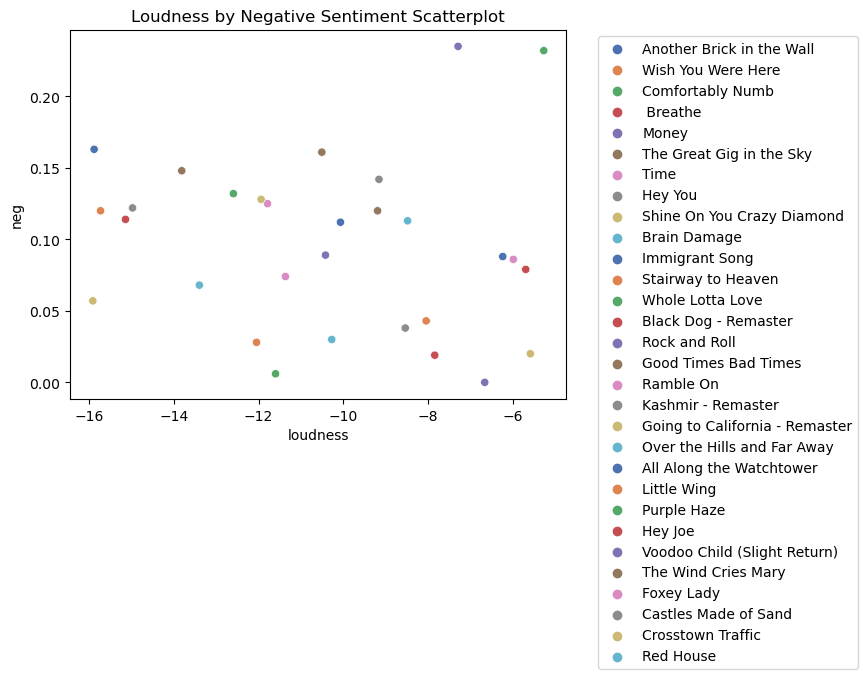

In [59]:
sb.scatterplot(data=combined_analysis_df, x="loudness", y="neg", hue="Band", palette="deep")
# used this following website to understand how to move a legend in matplotlib: 
# https://pieriantraining.com/matplotlib-tutorial-how-to-move-the-matplotlib-legend/#:~:text=The%20%60loc%60%20parameter%20is%20another,and%20%60'center'%60.
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Loudness by Negative Sentiment Scatterplot")
plt.show()

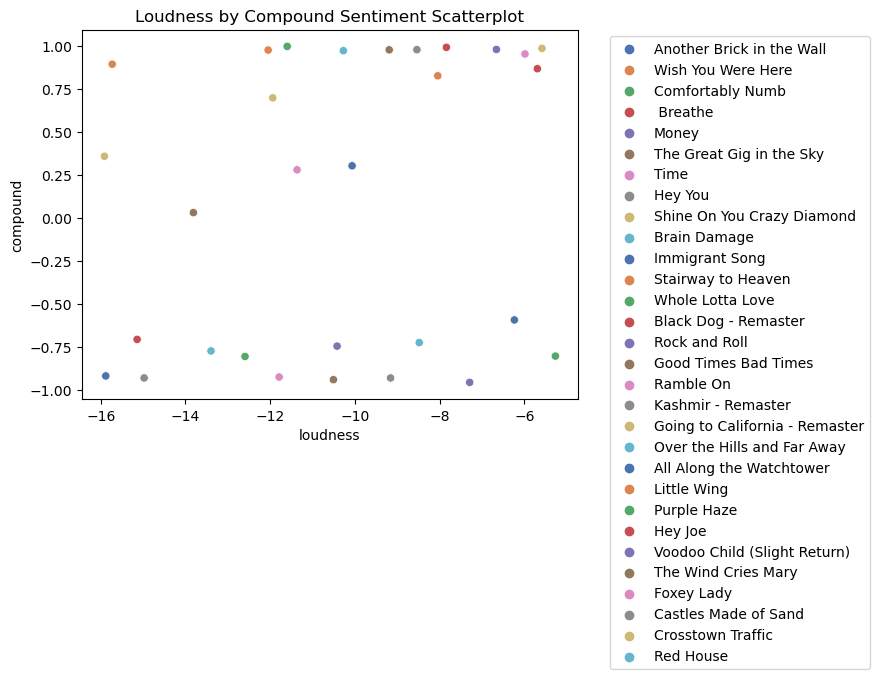

In [60]:
sb.scatterplot(data=combined_analysis_df, x="loudness", y="compound", hue="Band", palette="deep")
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Loudness by Compound Sentiment Scatterplot")
plt.show()

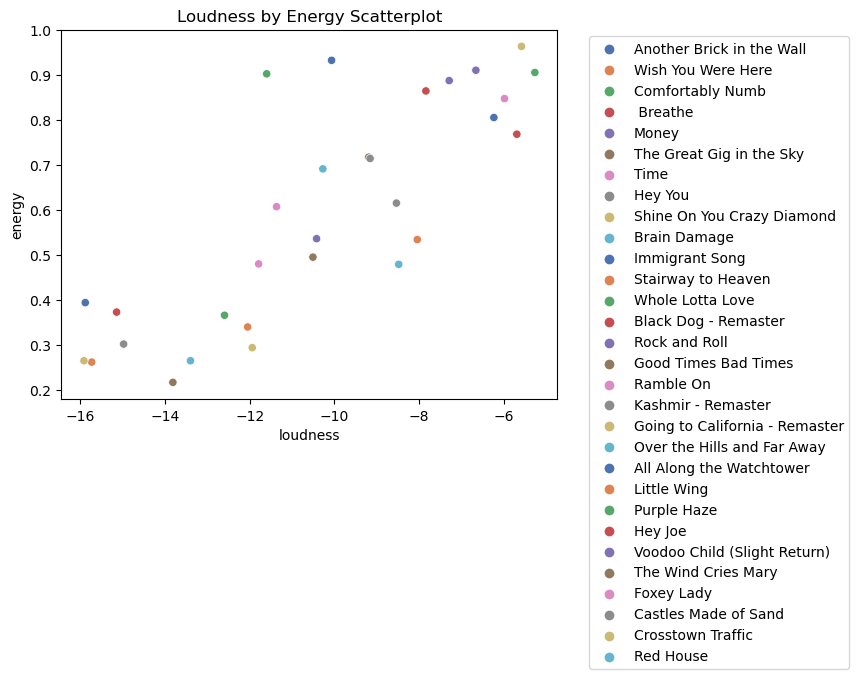

In [61]:
sb.scatterplot(data=combined_analysis_df, x='loudness', y='energy', hue='Band', palette="deep")
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Loudness by Energy Scatterplot")
plt.show()

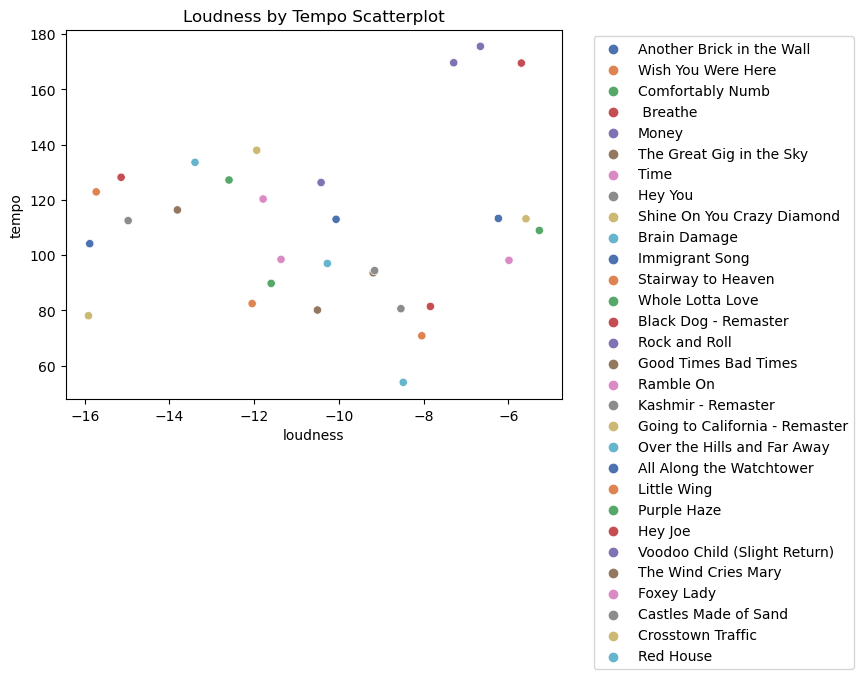

In [62]:
sb.scatterplot(data=combined_analysis_df, x='loudness', y='tempo', hue='Band', palette="deep")
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Loudness by Tempo Scatterplot")
plt.show()

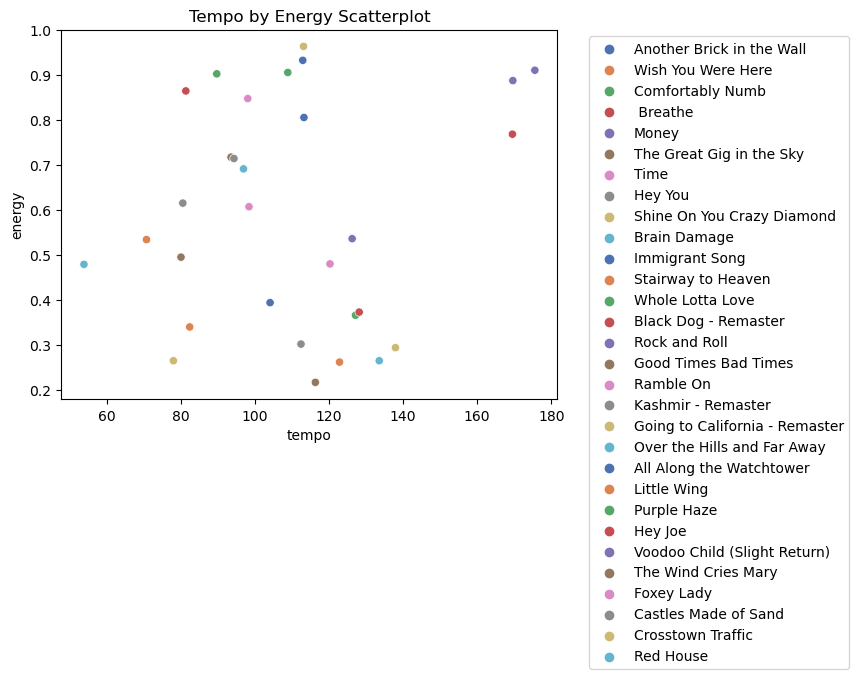

In [63]:
sb.scatterplot(data=combined_analysis_df, x='tempo', y='energy', hue='Band', palette="deep")
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Tempo by Energy Scatterplot")
plt.show()

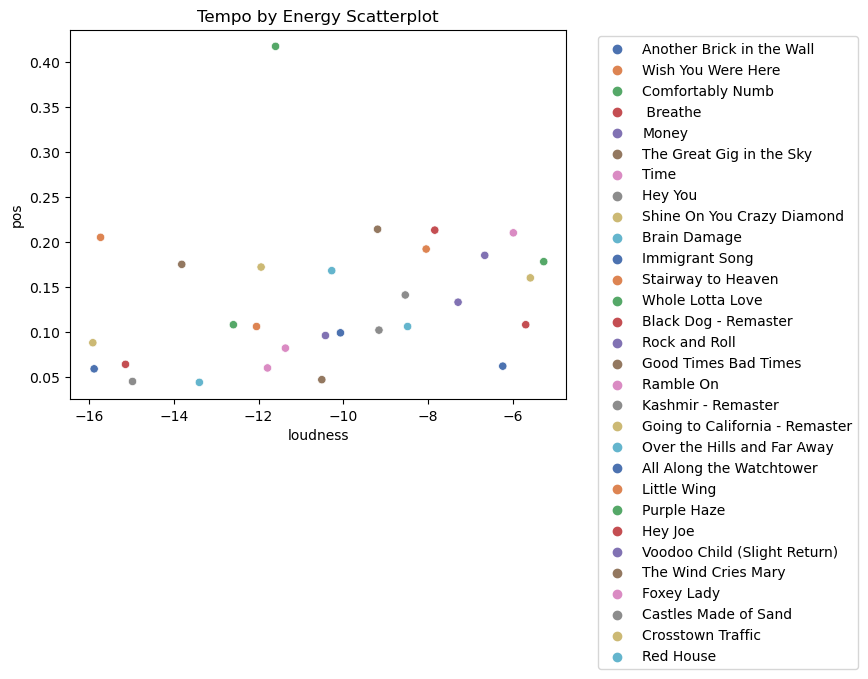

In [64]:
sb.scatterplot(data=combined_analysis_df, x='loudness', y='pos', hue='Band', palette="deep")
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Tempo by Energy Scatterplot")
plt.show()

C:\Users\luisf\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


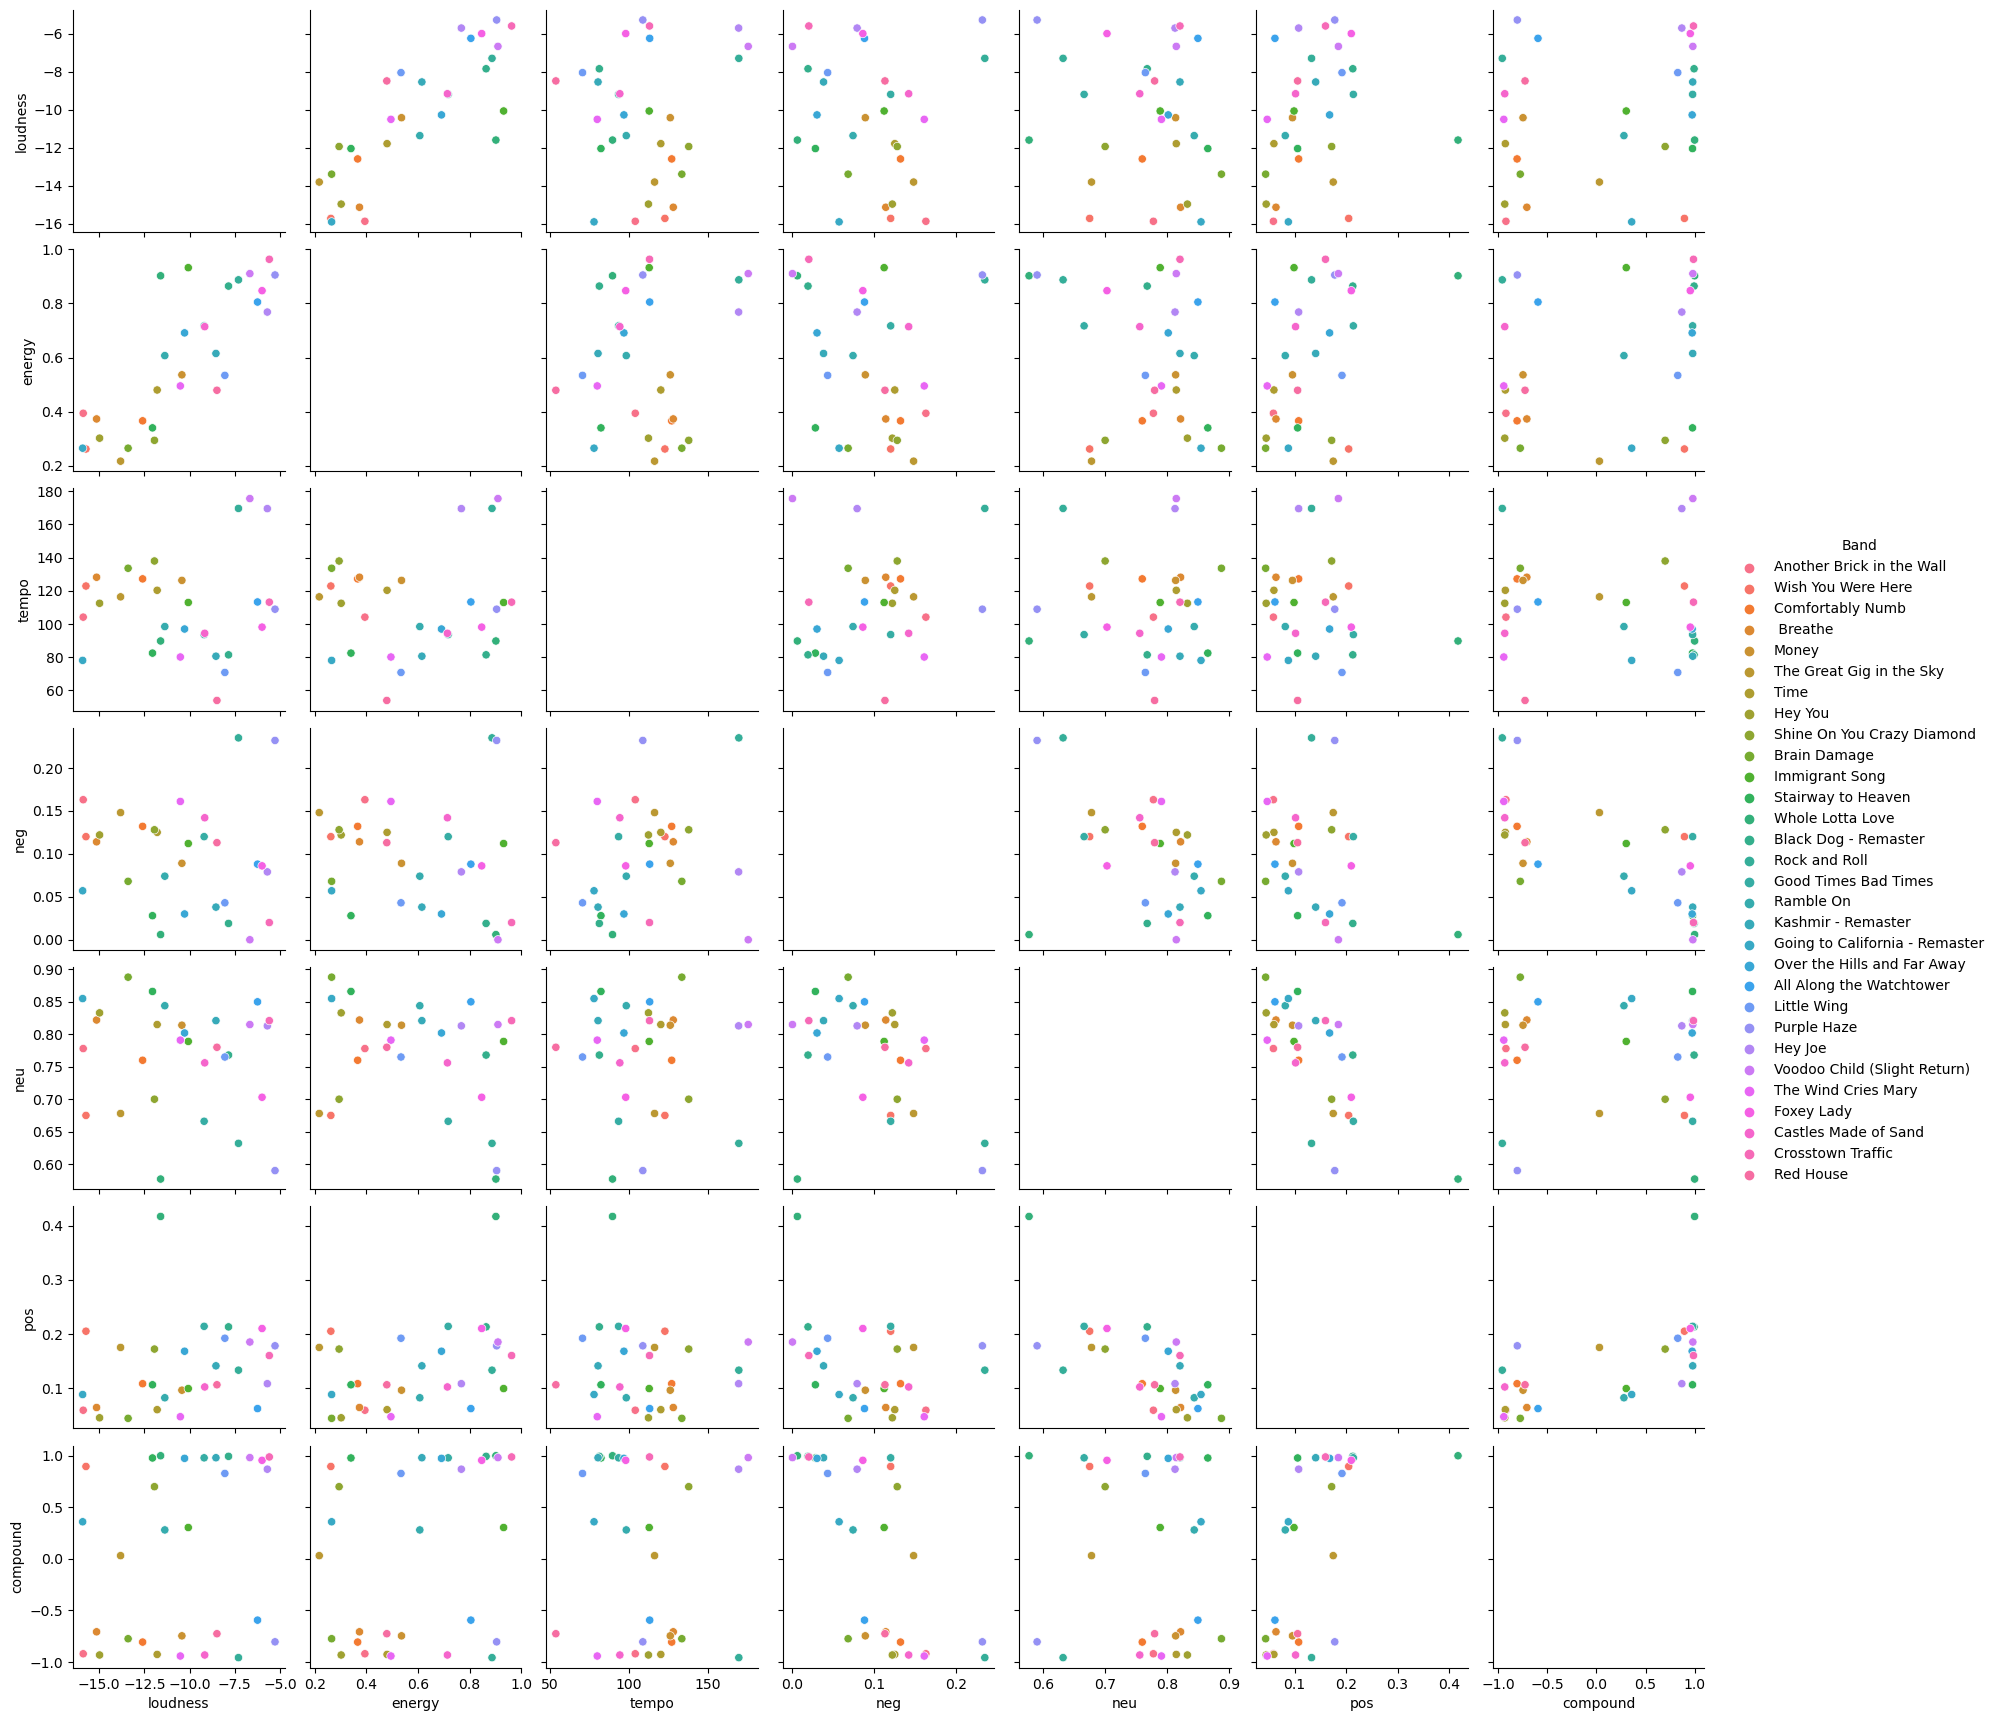

In [65]:
sb.pairplot(data=combined_analysis_df, hue="Band")
plt.show()